<a href="https://colab.research.google.com/github/UrviSinghal28/Machine-Learning-with-Python/blob/main/Tensorflow/Reinforcement%20Learning/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Frozen Lake Enviornment
The enviornment we are loading ```FrozenLake-v0``` is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:
- 16 states (one for each square) 
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

In [3]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 10000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [4]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[4.24743516e-01 1.11620611e-02 1.08799930e-02 1.03362210e-02]
 [1.75837720e-03 2.70721521e-03 1.82240814e-03 3.14897892e-01]
 [2.21946273e-01 1.87643968e-03 3.22357424e-03 3.49665731e-03]
 [1.31975541e-03 1.23782573e-03 2.46283218e-03 3.37702868e-03]
 [4.22190858e-01 8.90784643e-03 3.59659649e-03 6.83269110e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.44684761e-06 6.93131752e-07 3.89477798e-02 1.41773253e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.85622469e-03 3.85798223e-03 1.62920662e-03 4.41586225e-01]
 [2.80561917e-03 4.10470659e-01 3.08523096e-03 4.55484907e-03]
 [8.25967410e-01 2.02342245e-04 1.82917411e-04 1.47842455e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.62968740e-02 4.35881722e-02 5.56298283e-01 6.04971212e-02]
 [1.19153474e-01 9.26655785e-01 1.12300461e-01 1.19552585e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

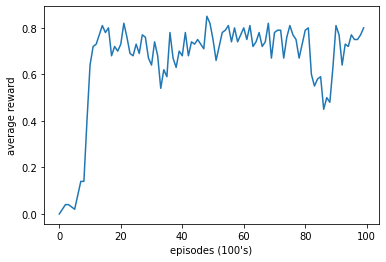

In [5]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()